In [1]:
import pandas as pd
dat = pd.read_csv("C:\\Users\\com\\Downloads\\dat_d.csv")

In [2]:
import numpy as np
import pandas as pd

dat['income_type'] = dat['income_type'].replace({'EARNEDINCOME':1,'EARNEDINCOME2':2,'FREELANCER':3,'OTHERINCOME':4,'PRACTITIONER':5,
                                                'PRIVATEBUSINESS':6}).astype('category')
dat['purpose'] = dat['purpose'].replace({'대환대출':1,'SWITCHLOAN':1,'생활비':2,'LIVING':2,'주택구입':3,'BUYHOUSE':3,'자동차구입':4,
                                        'BUYCAR':4,'사업자금':5,'BUSINESS':5,'투자':6,'INVEST':6,'전월세보증금':7,'HOUSEDEPOSIT':7,
                                        '기타':8,'ETC':8}).astype('category')
dat['houseown_type']=dat['houseown_type'].replace({'전월세':1,'자가':2,'배우자':3,'기타가족소유':4}).astype('category')
dat['employment_type']=dat['employment_type'].replace({'정규직':1,'계약직':2,'일용직':3,'기타':4}).astype('category')

# 라벨인코딩

dat['personal_rehabilitation_complete_yn'] = dat['personal_rehabilitation_complete_yn'].astype('category')
dat['is_applied'] = dat['is_applied'].astype('category')
dat['exloan'] = dat['exloan'].astype('category')
dat['age'] = dat['age'].astype('category')
dat['work_rank']=dat['work_rank'].astype('category')
dat['yearly_income']=dat['yearly_income'].astype('float32')
dat['desired_amount']=dat['desired_amount'].astype('float32')
dat['loan_limit']=dat['loan_limit'].astype('float32')
dat['loan_rate']=dat['loan_rate'].astype('float16')
dat['credit_score']=dat['credit_score'].astype('int16')
dat['work_time'] = dat['work_time'].astype('float32')
dat['existing_loan_amt']=dat['existing_loan_amt'].astype('float32')
dat['existing_loan_cnt']=dat['existing_loan_cnt'].astype('float16')

# 메모리 크기를 줄이기 위하여 타입 변경.


In [3]:
from sklearn.model_selection import train_test_split
feature = dat.drop(columns='is_applied')
target = dat['is_applied']
X_train,X_test,y_train,y_test = train_test_split(feature,target,random_state=2,stratify=target)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(X_train,y_train)
y_pred = rforest.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, f1_score

classification_report(y_pred,y_test)
f1_score(y_pred,y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, f1_score

classification_report(y_pred,y_test)
f1_score(y_pred,y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, f1_score

classification_report(y_pred,y_test)
f1_score(y_pred,y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, f1_score

classification_report(y_pred,y_test)
f1_score(y_pred,y_test)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, f1_score

classification_report(y_pred,y_test)
f1_score(y_pred,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature = dat.drop(columns='is_applied')
target = dat['is_applied']
X_train,X_test,y_train,y_test = train_test_split(feature,target,shuffle=True,random_state=2,stratify=target)


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=2)

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100,200,300],
          'max_depth' : [10,20,30],
          'max_features': [0.1,0.3,0.5,0.7],
          'min_samples_split' : [2,5,10]}
grid_search = GridSearchCV(RandomForestClassifier(),params,scoring='f1',cv=skf)
grid_search.fit(X_train,y_train)

In [ ]:
print('그리드 서치 결과 가장 높은 f1 score : {}'.format(grid_search.best_score_))
print('그리드 서치 결과 가장 좋은 초매개변수 : {}'.format(grid_search.best_params_))
rf_grid_score = grid_search.score(X_test,y_test)
print('테스트 데이터 f1 score : {}'.format(grid_search.score(X_test,y_test)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=2)

params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(),params,scoring='f1',cv=skf)
grid_search.fit(X_train,y_train)
print('그리드 서치 결과 가장 높은 f1 score : {}'.format(grid_search.best_score_))
print('그리드 서치 결과 가장 좋은 초매개변수 : {}'.format(grid_search.best_params_))
knn_grid_score = grid_search.score(X_test,y_test)
print('테스트 데이터 f1 score : {}'.format(grid_search.score(X_test,y_test)))

In [ ]:
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=2)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(),params,scoring='f1',cv=skf)
grid_search.fit(X_train,y_train)
print('그리드 서치 결과 가장 높은 f1 score : {}'.format(grid_search.best_score_))
print('그리드 서치 결과 가장 좋은 초매개변수 : {}'.format(grid_search.best_params_))
lr_grid_score = grid_search.score(X_test,y_test)
print('테스트 데이터 f1 score : {}'.format(grid_search.score(X_test,y_test))

In [ ]:
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=2)

params = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6,10],
              "n_estimators": [200,300,500,1000]
              }    

grid_search = GridSearchCV(XGBClassifier(),params,scoring='f1',cv=skf)
grid_search.fit(X_train,y_train)
print('그리드 서치 결과 가장 높은 f1 score : {}'.format(grid_search.best_score_))
print('그리드 서치 결과 가장 좋은 초매개변수 : {}'.format(grid_search.best_params_))
lr_grid_score = grid_search.score(X_test,y_test)
print('테스트 데이터 f1 score : {}'.format(grid_search.score(X_test,y_test))

In [ ]:
knn_clf  = KNeighborsClassifier(n_neighbors=4)
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

def get_stacking_data(model, X_train, y_train, X_test, n_folds = 5 ):
    stk = StratifiedKFold(n_split=n_folds,random_state=2)

    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train.shape[0] ,1 ))
    test_pred = np.zeros((X_test.shape[0],n_folds))

    for cnt , (train_index, valid_index) in enumerate(skf.split(X_train,y_train)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        X_tr = X_train[train_index] 
        y_tr = y_train[train_index] 
        X_te = X_train[valid_index]  

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, cnt] = model.predict(X_test)
   
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean


knn_train, knn_test = get_stacking_data(knn_clf, X_train, y_train, X_test, 5)
rf_train, rf_test = get_stacking_data(rf_clf, X_train, y_train, X_test, 5)
dt_train, dt_test = get_stacking_data(dt_clf, X_train, y_train, X_test,  5)    
ada_train, ada_test = get_stacking_data(ada_clf, X_train, y_train, X_test, 5)

Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

In [ ]:
f1 = {'knn':knnscore,'rf':rfscore,'lr':lrscore,'knn_grid':knn_grid_score,'rf_grid':rf_grid_score,'lr':lr_grid_score}
import matplotlib.pyplot as plt


sort_dic = dict(sorted(f1.items(), key = lambda pair : pair[1], reverse = True ))
print(sort_dic)
names = list(sort_dic.keys())
values = list(sort_dic.values())

plt.barh(range(len(sort_dic)), values, tick_label=names)
plt.show()

{'stacking': 0.87, 'xgb_grid': 0.76, 'weighted': 0.76, 'rf_grid': 0.74, 'knn_grid': 0.68, 'softvote': 0.68, 'xgb': 0.67, 'rf': 0.65, 'knn': 0.59, 'dt_grid': 0.59, 'lr_grid': 0.54, 'dt': 0.53, 'lr': 0.47}


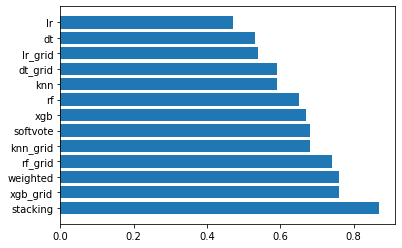

In [1]:
a = {'knn':0.59,'xgb':0.67,'rf':0.65,'dt':0.53,'lr':0.47,'knn_grid':0.68,'xgb_grid':0.76,'rf_grid':0.74,'dt_grid':0.59,'lr_grid':0.54,
     'stacking':0.87,'softvote':0.68,'weighted':0.76}

import matplotlib.pyplot as plt
sort_dic = dict(sorted( a.items(), key = lambda pair : pair[1], reverse = True ))
print(sort_dic)
names = list(sort_dic.keys())
values = list(sort_dic.values())

plt.barh(range(len(sort_dic)), values, tick_label=names)
plt.show()